<a href="https://colab.research.google.com/github/BrandonTang95/Flight-Price-Prediction-Project/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [84]:
# Imports for linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [85]:
df = pd.read_csv('clean_data_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78615 entries, 0 to 78614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         78615 non-null  object 
 1   Source          78615 non-null  object 
 2   Departure Time  78615 non-null  object 
 3   Stops           78615 non-null  int64  
 4   Arrival Time    78615 non-null  object 
 5   Destination     78615 non-null  object 
 6   Class           78615 non-null  object 
 7   Duration        78615 non-null  int64  
 8   Days Left       78614 non-null  float64
 9   Price           78614 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 6.0+ MB


## Preprocessing
Encoding data to be numerical for linear regression model

In [86]:
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'Business' else 0)

In [87]:
df = df.join(pd.get_dummies(df['Airline'], prefix='Airline').astype(int)).drop('Airline', axis=1)
df = df.join(pd.get_dummies(df['Source'], prefix='Source').astype(int)).drop('Source', axis=1)
df = df.join(pd.get_dummies(df['Destination'], prefix='Destination').astype(int)).drop('Destination', axis=1)
df = df.join(pd.get_dummies(df['Departure Time'], prefix='Departure Time').astype(int)).drop('Departure Time', axis=1)
df = df.join(pd.get_dummies(df['Arrival Time'], prefix='Arrival Time').astype(int)).drop('Arrival Time', axis=1)
df.info()

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78615 entries, 0 to 78614
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Stops                         78615 non-null  int64  
 1   Class                         78615 non-null  int64  
 2   Duration                      78615 non-null  int64  
 3   Days Left                     78614 non-null  float64
 4   Price                         78614 non-null  float64
 5   Airline_AirAsia               78615 non-null  int64  
 6   Airline_Air_India             78615 non-null  int64  
 7   Airline_GO_FIRST              78615 non-null  int64  
 8   Airline_Indigo                78615 non-null  int64  
 9   Airline_SpiceJet              78615 non-null  int64  
 10  Airline_Vistara               78615 non-null  int64  
 11  Source_Delhi                  78615 non-null  int64  
 12  Source_Mumbai                 78615 non-null  int64  
 13  D

## Training Regression Model

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [89]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [91]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

0.48170245220557883


## Calculate Residuals


In [94]:
residuals = y_test - y_pred
print("Residuals calculated successfully.")

Residuals calculated successfully.


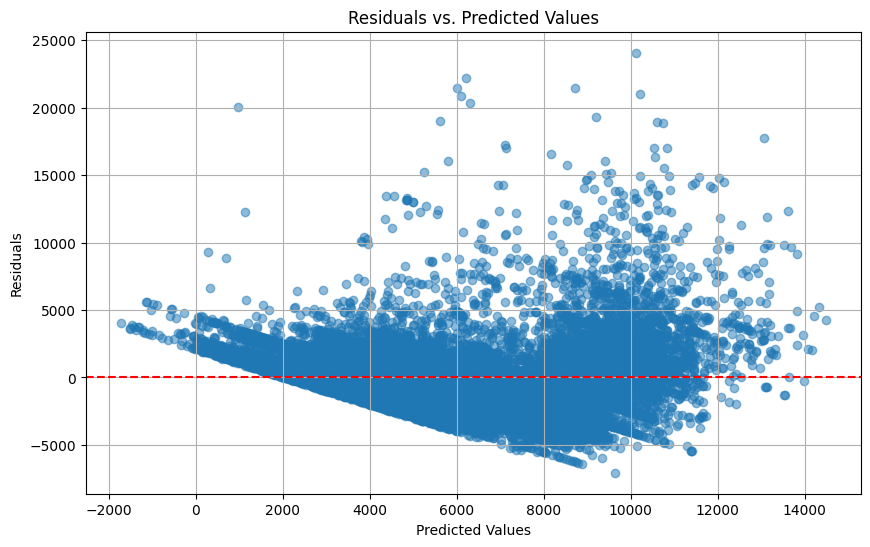

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()


In [96]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 6923181.74
R-squared: 0.48


## Conclusion
Linear Regression Model is a very **poor** fit for this problem.